# Bagging and Boosting

## Decision trees

In [3]:
!gdown 1eheisonKu8xCOSuqXu34elnt6rTOhXh5

Downloading...
From: https://drive.google.com/uc?id=1eheisonKu8xCOSuqXu34elnt6rTOhXh5
To: /Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/bill_authentication.csv
100%|██████████████████████████████████████| 46.4k/46.4k [00:00<00:00, 1.38MB/s]


In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('Datasets/bill_authentication.csv')

In [5]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


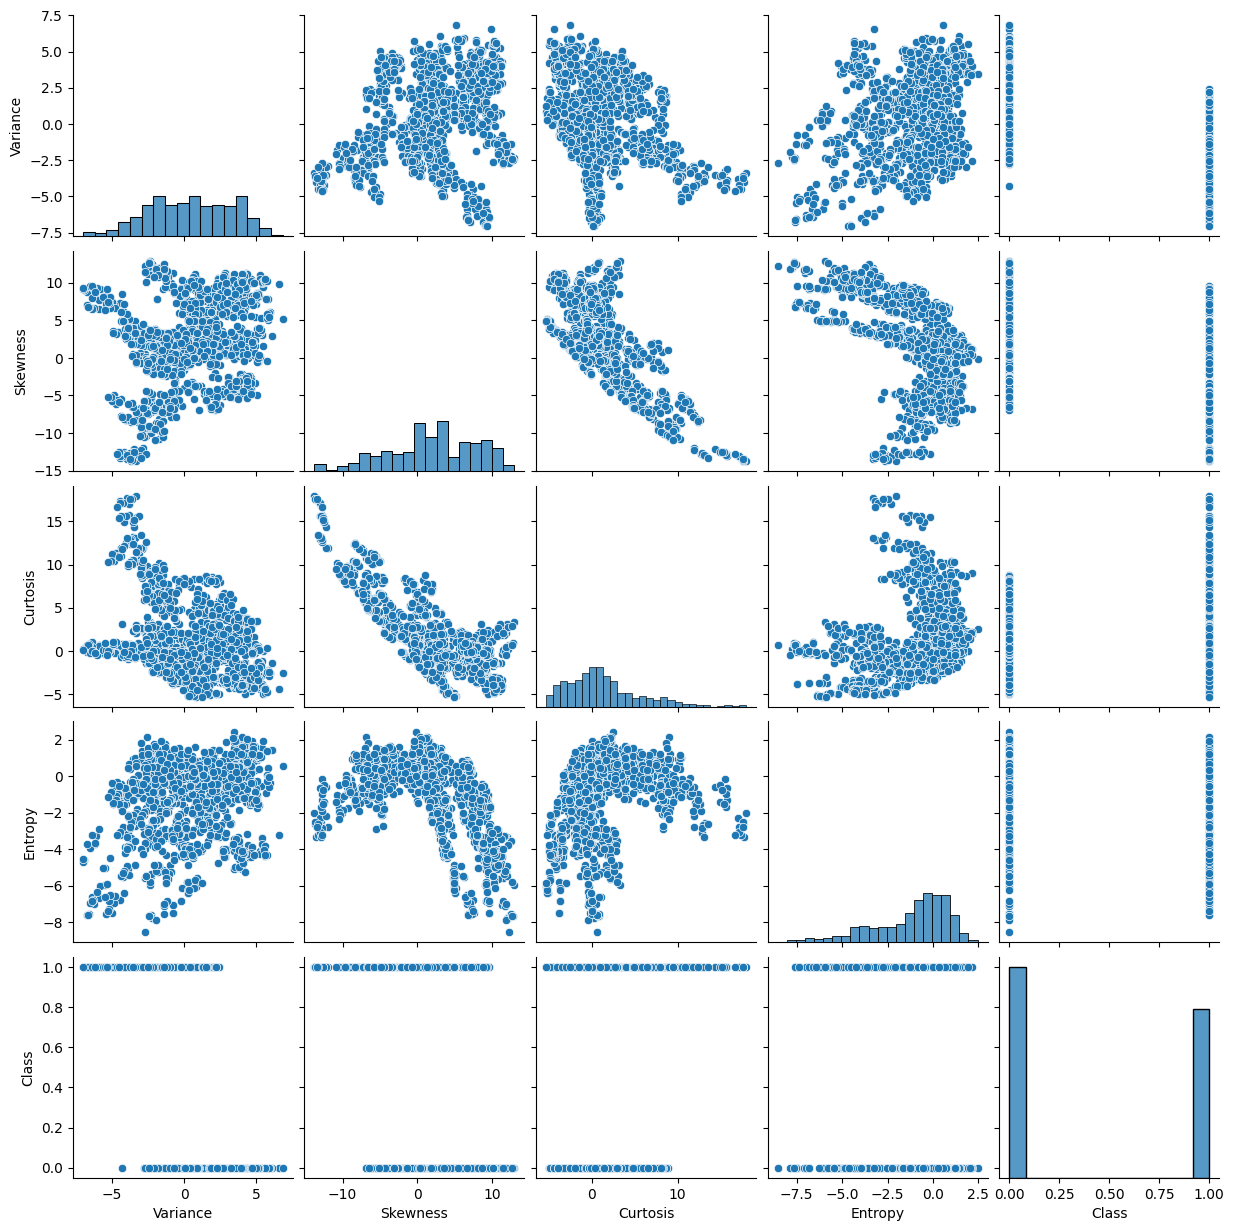

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)

In [7]:
data.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

X, y = data.drop(columns='Class'), data['Class']
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.2)

In [9]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, Y_train)

pred_y = classifier.predict(X_test)

In [11]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, pred_y))

Accuracy: 0.9090909090909091


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, pred_y))
print(classification_report(Y_test, pred_y))

[[141  14]
 [ 11 109]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       155
           1       0.89      0.91      0.90       120

    accuracy                           0.91       275
   macro avg       0.91      0.91      0.91       275
weighted avg       0.91      0.91      0.91       275



In [13]:
classifier_opt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

classifier_opt = classifier_opt.fit(X_train,Y_train)
y_pred = classifier_opt.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.92


In [14]:
!gdown 1z611SxFGAJaIKH4nAqKhFy2uKNNZw6tn
!gdown 1cNz31tLmAb_eSOOqcNQiAoMAmfQQfkAe

Downloading...
From: https://drive.google.com/uc?id=1z611SxFGAJaIKH4nAqKhFy2uKNNZw6tn
To: /Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/50_Startups.csv
100%|██████████████████████████████████████| 2.44k/2.44k [00:00<00:00, 6.17MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cNz31tLmAb_eSOOqcNQiAoMAmfQQfkAe
To: /Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/Position_Salaries.csv
100%|███████████████████████████████████████████| 246/246 [00:00<00:00, 872kB/s]


In [15]:
pos_salaries = pd.read_csv('Datasets/Position_Salaries.csv')

In [16]:
pos_salaries.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


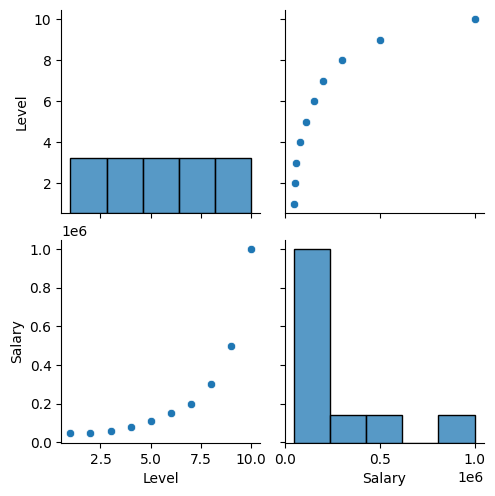

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(pos_salaries)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(pos_salaries[pos_salaries.columns[1:-1]],  pos_salaries['Salary'], test_size=0.2)

In [21]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

In [22]:
print("Accuracy:",regressor.score(X_test, Y_test))

Accuracy: -0.03111111111111109


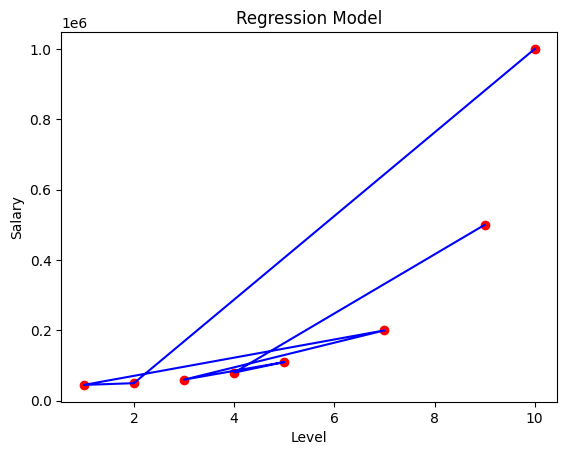

In [23]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

/var/folders/4x/rp6vx2y96j93y96_rr45bkzc0000gn/T/ipykernel_8362/296780989.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train.values), max(X_train.values), 0.01)
/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


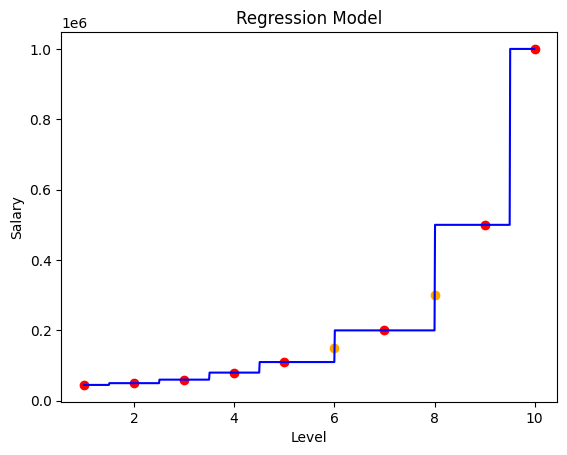

In [26]:
X_grid = np.arange(min(X_train.values), max(X_train.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, Y_train, color = 'red')
plt.scatter(X_test, Y_test, color = 'orange')

plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')

plt.title('Regression Model')
plt.xlabel('Level')
plt.ylabel('Salary')

plt.show()

In [27]:
startups = pd.read_csv('Datasets/50_Startups.csv')

In [28]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
startups = startups.drop(columns=['State','Administration'])

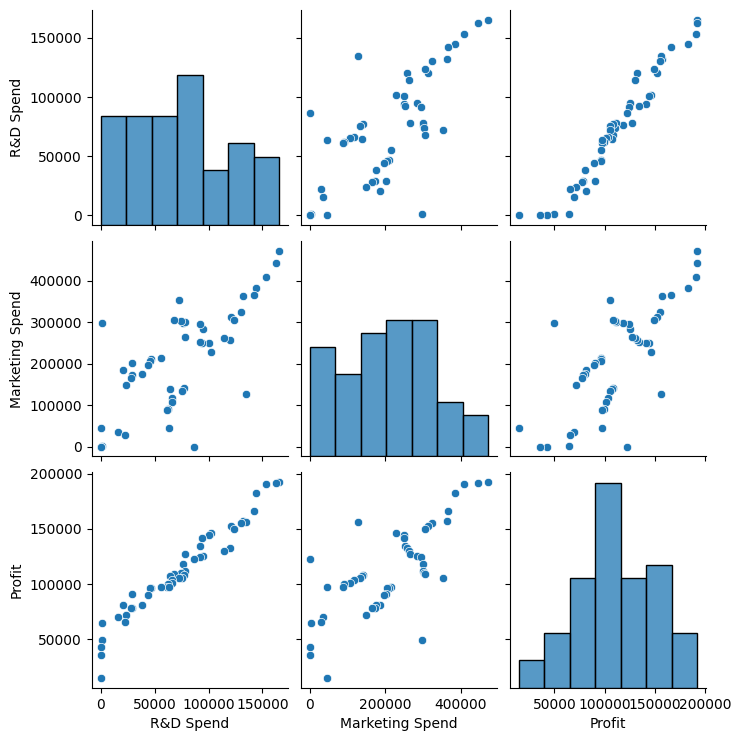

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(startups)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(startups[startups.columns[:-1]],  startups['Profit'], test_size=0.2)

In [35]:
from sklearn.tree import DecisionTreeRegressor

regressor2 = DecisionTreeRegressor()
regressor2.fit(X_train, Y_train)

y_pred2 = regressor2.predict(X_test)

In [36]:
print("Accuracy:",regressor2.score(X_test, Y_test))

Accuracy: 0.9392557259175865


/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


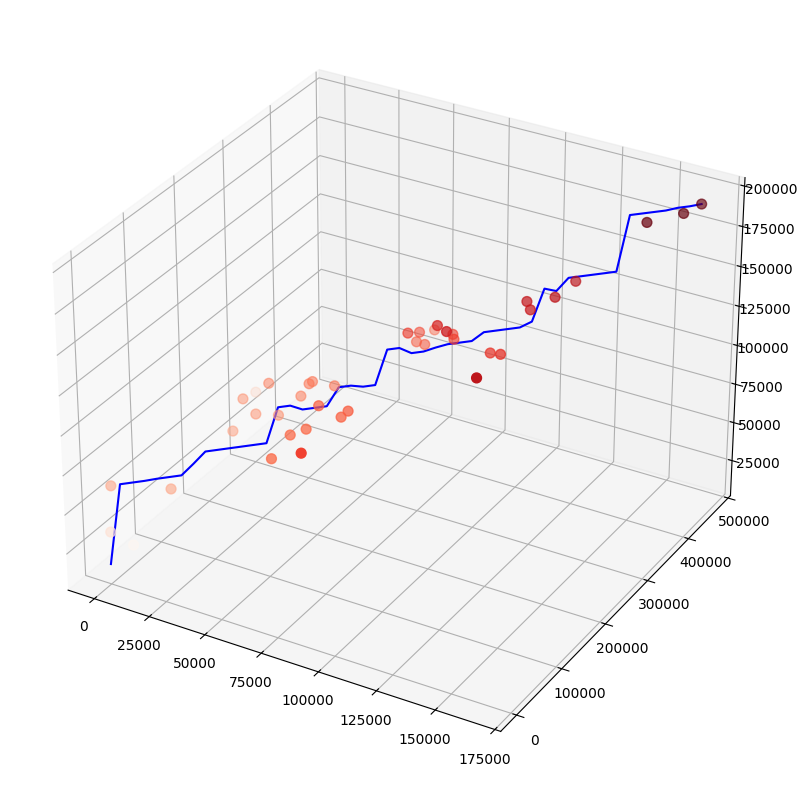

In [37]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

zdata = Y_train
xdata = X_train.iloc[:, 0]
ydata = X_train.iloc[:, 1]

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds', s=50);

xline = np.linspace(min(xdata), max(xdata), 50)
yline = np.linspace(min(ydata), max(ydata), 50)

z = np.concatenate((xline.reshape(-1,1),yline.reshape(-1,1)), axis = 1)
zline = regressor2.predict(z)

ax.plot3D(xline, yline, zline, 'blue')

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
)


rf.fit(X_train, Y_train)
preds = rf.predict(X_test)

r2 = r2_score(Y_test, preds)
mae = mean_absolute_error(Y_test, preds)
rmse = mean_squared_error(Y_test, preds)

print(f"R²:   {r2:.4f}")
print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

R²:   0.9767
MAE:  4,812.93
RMSE: 40,979,033.99


## Boosting

In [39]:
!gdown 1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j

Downloading...
From: https://drive.google.com/uc?id=1Ua8MF62uBDnJJ1V3Y1i72tlQ0OioHK-j
To: /Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/bill_authentication.csv
100%|██████████████████████████████████████| 46.4k/46.4k [00:00<00:00, 2.15MB/s]


In [40]:
import pandas as pd
import numpy as np

data = pd.read_csv('Datasets/bill_authentication.csv')
data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [45]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=50, min_child_weight=1, n_estimators=200, n_jobs=-1, verbose=1, learning_rate=0.16)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [14:44:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [46]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9927272727272727


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[159   1]
 [  1 114]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       160
           1       0.99      0.99      0.99       115

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [48]:
!gdown 1oNcb8M_0w_h2AOe7xiuw_mDZkAU6SF9H

Downloading...
From: https://drive.google.com/uc?id=1oNcb8M_0w_h2AOe7xiuw_mDZkAU6SF9H
To: /Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/train.csv
100%|████████████████████████████████████████| 461k/461k [00:00<00:00, 3.34MB/s]


In [49]:
data = pd.read_csv('Datasets/train.csv')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [51]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [52]:
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)

In [55]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [58]:
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [15:11:37] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, Y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred, Y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))

Mean Absolute Error : 29626.109375
Mean Squared Error : 2032925312.0
Root Mean Squared Error : 45087.97303051003


In [60]:
from xgboost import cv, DMatrix

data_dmatrix = DMatrix(data=X, label=y)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5,'alpha': 10}

cv_results = cv(dtrain=data_dmatrix, params=params, nfold=3,
                num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/.venv/lib/python3.13/site-packages/xgboost/training.py:225: UserWarning: [15:12:15] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  return getattr(self.bst, name)(*args, **kwargs)
/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/.venv/lib/python3.13/site-packages/xgboost/training.py:231: UserWarning: [15:12:15] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.bst.update(self.dtrain, iteration, fobj)


In [61]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,73318.662150,571.195471,74081.831879,1238.909201
1,68232.109048,535.862306,69462.153460,1813.446308
2,63391.426587,526.399332,65307.872183,1642.084103
3,59026.151925,551.187142,61726.911908,1629.604966
4,54714.686371,476.179175,57865.173906,1562.235084


## LGBM

In [62]:
data = pd.read_csv('Datasets/bill_authentication.csv')

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [65]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

[LightGBM] [Info] Number of positive: 489, number of negative: 608
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1097, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.445761 -> initscore=-0.217812
[LightGBM] [Info] Start training from score -0.217812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [66]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[154   0]
 [  2 119]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       154
           1       1.00      0.98      0.99       121

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



## Cat Boost

In [67]:
data = pd.read_csv('Datasets/bill_authentication.csv')

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [69]:
from catboost import CatBoostClassifier
from random import seed

cb_model= CatBoostClassifier(loss_function='Logloss',eval_metric='AUC',verbose=200,random_seed=seed(1))
cb_model.fit(X_train,Y_train)

Learning rate set to 0.010718
0:	total: 57ms	remaining: 57s
200:	total: 275ms	remaining: 1.09s
400:	total: 463ms	remaining: 692ms
600:	total: 641ms	remaining: 425ms
800:	total: 877ms	remaining: 218ms
999:	total: 1.06s	remaining: 0us


In [70]:
y_pred = cb_model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[160   1]
 [  0 114]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       161
           1       0.99      1.00      1.00       114

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Naive Bayes

In [72]:
data = pd.read_csv('Datasets/bill_authentication.csv')

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( data[data.columns[:-1]],  data['Class'], test_size=0.2)

In [74]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,Y_train)

y_pred= model.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[129  18]
 [ 23 105]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       147
           1       0.85      0.82      0.84       128

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275



In [76]:
import pandas as pd
Position_Salaries = pd.read_csv('Datasets/Position_Salaries.csv', sep =',')
Position_Salaries

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000
